___


--- 


## This main code is part of the paper "Analysis of Socioeconomic Indicators in Brazil and the Americas," by L.C. Rossato, S. Gonçalves, and J.R. Iglesias.

--- 

 For better visualization, use Jupyter.

---

#### 7 References Databases: Goverment Data Sites (or oficial pdf informes HDI):
* `Mexico`:  [Link Database Mexico](https://www.inegi.org.mx/siscon/)
* `Chile`:   [Link Database Chile](https://repositorio.uautonoma.cl/bitstream/handle/20.500.12728/6742/V11digitalfinal.pdf?sequence=1&isAllowed=y)
* `Peru`: [Link Database Peru](https://www.up.edu.pe/egp/programas-especializacion_copy(1)/SiteAssets/Lists/Observatorio/AllItems/Informe%20de%20Evidencia%20IDH%202019.pdf)
* `El Salvador`:  [Link Database El_Salvador](https://www.undp.org/sites/g/files/zskgke326/files/publications/El%20Salvador_MDGReport_2005_SP.pdf)
* `Brazil`:  [Link Database Brazil](https://censo2010.ibge.gov.br/resultados.html)
* `USA`:  [Link Database USA](https://web.archive.org/web/20110615084942/http://www.census.gov/hhes/www/poverty/poverty.html)
____

#### Used colors in paper for Brazil macrorregions:  
HEX Colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'] ; Respectively [Midwest, Southeast, North, Northeast  and South]

#### List of colors for different datasets:
['green', 'blue', 'red', 'purple', 'orange', 'brown'] <=> [Brazil, Chile, Peru, Mexico , El Salvador and USA]

---
---
---

#### Readme:

The data engineering process to build the "Table_Graph_Result" table has been omitted because it is a very large code that can make the notebook heavy. Essentially, it consists of:

1) Generating each of the tables individually from the "MainCode2__BasedOn_GCA_Gravitational_Clustering_Algorithm";
2) Performing the union of the individual tables;
3) Exporting the raw (unstyled) table as "Table_Graph_Result.csv".

The styling process of the table is demonstrated here. The generation of the compared graphs is also shown in this notebook. 

---
---
---

___
___
___


# Base on GCA (Gravitional Cluster Algorithmn)


# Base for Fig.9 and Fig.10:

Fig. 9: Table containing statistical information of the corresponding networks (graphs)
for each country after the scatter plot conversion process using ”Based on GCA” (Sec.
2.3)

Fig. 10: Graphical representation of four variables from table (Fig. 9), corresponding
to: Average Degree, Variance, Standard Deviation, and Eccentricity, using bar and
line charts.

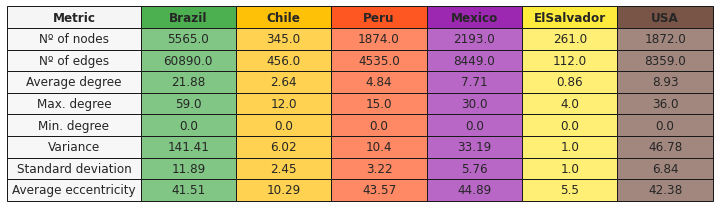

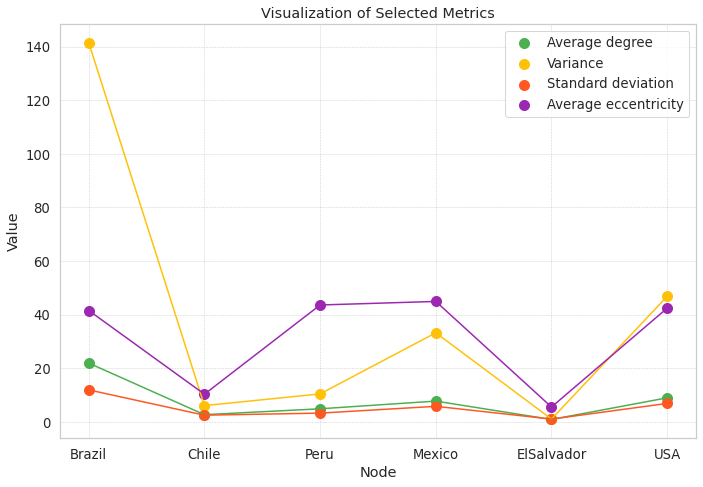

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns

# Import the dataframe
result_df = pd.read_csv('Table_Graph_Result.csv')

# Adjust visualization configuration
sns.set(font_scale=1.2, style="whitegrid")

# Render a DataFrame as a custom table using Matplotlib
def display_dataframe_as_custom_table(df, opacity=0.7):
    fig, ax = plt.subplots(figsize=(14, 4)) # adjust size as needed
    ax.axis('off')
    ax.set_frame_on(False)
    
    # Define colors for the table cells and headers
    colors = ['#f5f5f5', '#4CAF50', '#FFC107', '#FF5722', '#9C27B0', '#FFEB3B', '#795548']
    rgba_colors = [(*matplotlib.colors.to_rgb(color), opacity) for color in colors]
    header_colors = colors
    
    # Create a list to store colors for each row
    cell_colors = []
    for _ in range(len(df)):
        cell_colors.append(rgba_colors)
    
    # Create the table
    tab = plt.table(cellText=df.values, 
                    colLabels=df.columns, 
                    cellLoc='center', 
                    loc='center',
                    cellColours=cell_colors,
                    colColours=header_colors,
                    bbox=[0, 0, 1, 1])
    
    # Adjust font size
    tab.auto_set_font_size(False)
    tab.set_fontsize(12)
    
    # Customize cells and headers
    for (i, j), cell in tab.get_celld().items():
        if i == 0:
            cell.set_text_props(fontweight='bold')  # Bold font for headers
            cell.set_facecolor(colors[j])  # Set header background color
        if j == 0:
            cell.set_width(0.2)  # Adjust width of the first column 

    # Hide x and y axes
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    
    # Adjust subplot layout
    plt.subplots_adjust(left=0.2, top=0.8)

# Show the personalized DataFrame as Table
display_dataframe_as_custom_table(result_df.round(2))

# Save the figure as PNG and SVG
# plt.savefig('custom_result_df_opacity_corrected.png', dpi=300, bbox_inches='tight')
# plt.savefig('custom_result_df_opacity_corrected.svg', bbox_inches='tight')

plt.show()

# Selected metrics
selected_metrics = ["Average degree", "Variance", 'Standard deviation', 'Average eccentricity']

# Filter the DataFrame based on the selected metrics
filtered_data = result_df[result_df["Metric"].isin(selected_metrics)]

# Colors for respective metrics (same colors defined earlier)
colors = ['#4CAF50', '#FFC107', '#FF5722', '#9C27B0']

# Plot
plt.figure(figsize=(10, 7))

for i, metric in enumerate(selected_metrics):
    x = range(len(filtered_data.columns)-1)
    y = filtered_data[filtered_data["Metric"] == metric].values[0][1:]
    plt.scatter(x, y, s=100, color=colors[i], label=metric)
    plt.plot(x, y, color=colors[i], linestyle='-')

plt.xticks(ticks=range(len(filtered_data.columns)-1), labels=filtered_data.columns[1:])
plt.ylabel('Value')
plt.xlabel('Node')
plt.title('Visualization of Selected Metrics')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
# plt.savefig('selected_metrics_visualization_with_lines.png', dpi=300)
# plt.savefig('selected_metrics_visualization_with_lines.svg', dpi=300)
plt.show()